In [1]:
%config Completer.use_jedi = False

import sys
sys.path.append('../../ACORE-LFI/')
sys.path.append('../../ACORE-LFI/acore/')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from models.muon_features import MuonFeatures
from acore_ada import ACORE

In [2]:
simulated_data = pd.read_csv("../data/mueloss_allcorrect_server.asc", sep=" ", header=None)
simulated_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.155409,4.290210,0.532169,0.532169,108.087,74.2568,144.1530,132.2050,93.6240,22.9914,1.0,633.0,5.107920,10.0,298.0,0.017276,511.416931
1,4.658042,7.676993,0.696736,0.696736,178.371,173.6490,100.9310,29.7645,206.0040,66.9711,1.0,22.0,0.087102,381.0,367.0,2.430710,1197.671997
2,8.706887,11.899366,0.576239,0.576239,179.726,191.8020,191.1600,183.6720,153.8790,51.2024,1.0,154.0,0.740475,757.0,580.0,4.502390,1641.895386
3,9.173737,12.180599,0.785258,0.785258,176.070,139.8560,111.2590,179.3520,339.6140,115.3030,1.0,184.0,0.468194,396.0,638.0,2.486170,1491.137817
4,3.662112,8.014427,0.663907,0.663907,133.329,143.9140,99.8131,100.9650,57.7814,166.6640,1.0,103.0,0.303194,257.0,495.0,0.303229,784.737427


In [3]:
observed_data = pd.read_csv("../data/MuEloss_N15258_em0.1.asc", sep=" ", header=None)
observed_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2.151350,6.21376,0.874055,0.527631,177.694,108.5850,60.7774,222.5790,120.6270,104.7010,1,7,1.845360,2,1,0.305992,718.829
1,6.407480,8.75995,0.868453,0.659947,159.245,78.8789,149.6910,122.0710,281.0410,106.5380,1,14,4.383460,5,3,1.048960,1801.220
2,1.054870,5.12920,1.408480,1.645920,129.751,163.4660,132.6840,87.6723,174.0450,56.4806,1,2,0.419499,1,4,0.221153,754.720
3,0.991064,5.81620,0.989336,1.873110,142.272,110.4350,122.1010,132.0450,55.0311,192.1830,1,3,0.697062,1,2,0.151685,1757.080
4,17.784600,13.72330,0.736310,0.759020,173.362,46.5559,123.1190,152.4450,40.5343,186.9600,1,33,16.193800,4,3,0.837678,1605.140


### Integrated energy

In [4]:
def integrated_energy_df(data):
    integrated_energy = data.iloc[:, [0,1]].sum(axis=1)
    output_df = data.iloc[:, [-1]].rename(columns={16: "true_energy"})
    output_df.loc[:, "integrated_energy"] = integrated_energy
    return output_df.iloc[:, [1,0]]

In [5]:
simulated_data = integrated_energy_df(simulated_data)
simulated_data.head()

,integrated_energy,true_energy
0,5.445619,511.416931
1,12.335035,1197.671997
2,20.606253,1641.895386
3,21.354336,1491.137817
4,11.676539,784.737427


In [6]:
observed_data = integrated_energy_df(observed_data)
observed_data.head()

,integrated_energy,true_energy
0,8.365110,718.829
1,15.167430,1801.220
2,6.184070,754.720
3,6.807264,1757.080
4,31.507900,1605.140


In [13]:
model = MuonFeatures(simulated_data=simulated_data,
                     observed_data=observed_data,
                     t0_grid_granularity=100, 
                     true_param_low=100, 
                     true_param_high=2000, 
                     param_dims = 1,
                     observed_dims=1,
                     reference_g='marginal',
                     param_column=1, 
                     debug=True)

In [14]:
acore = ACORE(model=model, 
              b=10000, 
              b_prime=10000, 
              alpha=0.05, 
              classifier_or='XGBoost \n (d3, n1000)', 
              classifier_qr='xgb_d3_n500',   
              sample_size_obs=1, 
              debug=True)

In [ ]:
acore.confidence_band()

ERROR! Session/line number was not unique in database. History logging moved to new session 624


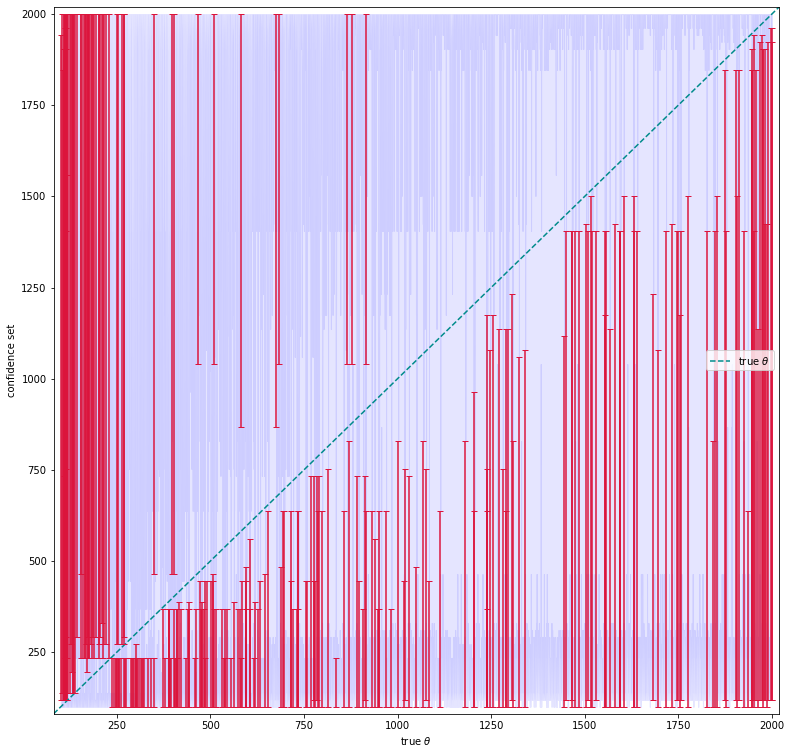

In [16]:
df = acore.plot_confidence_band(return_df=True)

In [18]:
df.loc[df.covered == False, :]

,obs_theta,lower,upper,covered,error_bar_center,lower_err,upper_err
3689,100.067,119.191919,1942.424242,False,1030.808081,911.616162,911.616162
12288,104.449,138.383838,2000.000000,False,1069.191919,930.808081,930.808081
9525,106.059,119.191919,1846.464646,False,982.828283,863.636364,863.636364
8917,107.649,119.191919,2000.000000,False,1059.595960,940.404040,940.404040
10182,108.948,119.191919,733.333333,False,426.262626,307.070707,307.070707
...,...,...,...,...,...,...,...
930,1986.550,100.000000,1424.242424,False,762.121212,662.121212,662.121212
8833,1990.510,119.191919,1923.232323,False,1021.212121,902.020202,902.020202
9139,1997.900,119.191919,1961.616162,False,1040.404040,921.212121,921.212121
1263,1999.530,119.191919,1923.232323,False,1021.212121,902.020202,902.020202


In [19]:
pd.Series(df.loc[:, "upper"] - df.loc[:, "lower"]).describe()

count    15258.000000
mean      1712.137299
std        341.491531
min        134.343434
25%       1765.656566
50%       1861.616162
75%       1861.616162
max       1880.808081
dtype: float64

/Users/lucamasserano/Desktop/uni/cmu/ada/ada_code/hep-lfi/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


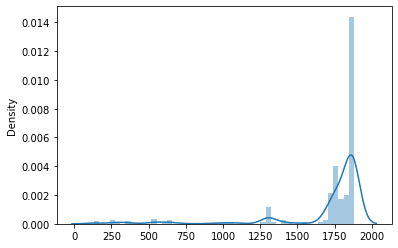

In [20]:
sns.distplot(pd.Series(df.loc[:, "upper"] - df.loc[:, "lower"]))